In [90]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

np.random.seed(2)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop


Data Preparation

In [57]:
#Load Data
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [58]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

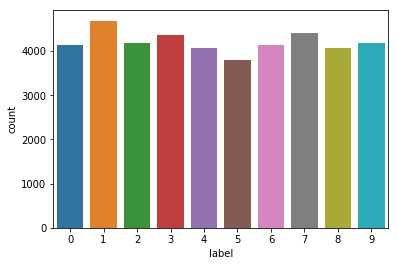

In [59]:
#Assign label column from train to Y_train
Y_train = train['label']

#drop 'label' column from train
X_train = train.drop(columns=['label'],axis=1)
#X_train.head()

del train#to free space

g=sns.countplot(Y_train)

Y_train.value_counts()

In [60]:
#Check for Null and missing Values

X_train.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [61]:
test.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [62]:
# Normalization
X_train = X_train /255.0
test = test/255.0

#Reshape image in 3 dimensions

X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

#Encode labels to one hot vectors
Y_train = to_categorical(Y_train, num_classes =10)


In [63]:
#Split training and validation set
random_seed =2

X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size =0.1, random_state= random_seed)

In [64]:
#g =plt.imshow(X_train[5][:,:,0])

CNN

In [65]:
#specify dimensions of input
input_shape= (28,28,1)

In [80]:
#type of the model
model = Sequential()

#first convolutional layer
model.add(Conv2D(16,kernel_size=(5,5),activation= 'relu',input_shape = input_shape))

#second convolutional layer
model.add(Conv2D(32, (3, 3), activation='relu'))
          
#max pooling and flatten for using Dense layers

model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,kernel_size=(5,5),activation= 'relu'))          
model.add(Conv2D(64,kernel_size=(5,5),activation= 'relu'))          

model.add(MaxPool2D(pool_size=(2,2), strides =(2,2)))
model.add(Dropout(0.25))
          
model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(10,activation = 'softmax'))
          
          

In [81]:
#optimizer

optimizer = RMSprop(lr=0.001, rho = 0.9, epsilon = 1e-08, decay = 0.0)

In [83]:
#compile the model
model.compile(optimizer=optimizer, loss = 'categorical_crossentropy', metrics = ["accuracy"])


batch_size=86

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 24, 24, 16)        416       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 22, 22, 32)        4640      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 11, 11, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 7, 7, 64)          51264     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 3, 3, 64)          102464    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 1, 1, 64)          0         
__________

In [84]:
history = model.fit(X_train,Y_train,batch_size = 86,epochs =10, verbose =1, validation_data = (X_val,Y_val))

Train on 37800 samples, validate on 4200 samples
Epoch 1/10
37800/37800 [==============================] - 44s 1ms/step - loss: 0.3743 - acc: 0.8783 - val_loss: 0.0958 - val_acc: 0.9707
Epoch 2/10
37800/37800 [==============================] - 48s 1ms/step - loss: 0.0900 - acc: 0.9738 - val_loss: 0.0430 - val_acc: 0.9871
Epoch 3/10
37800/37800 [==============================] - 47s 1ms/step - loss: 0.0628 - acc: 0.9820 - val_loss: 0.0398 - val_acc: 0.9886
Epoch 4/10
37800/37800 [==============================] - 42s 1ms/step - loss: 0.0520 - acc: 0.9852 - val_loss: 0.0441 - val_acc: 0.9883
Epoch 5/10
37800/37800 [==============================] - 42s 1ms/step - loss: 0.0436 - acc: 0.9872 - val_loss: 0.0356 - val_acc: 0.9921
Epoch 6/10
37800/37800 [==============================] - 42s 1ms/step - loss: 0.0385 - acc: 0.9894 - val_loss: 0.0532 - val_acc: 0.9895
Epoch 7/10
37800/37800 [==============================] - 43s 1ms/step - loss: 0.0360 - acc: 0.9901 - val_loss: 0.0447 - val_acc:

In [95]:
results = model.predict(test)
results = np.argmax(results,axis = 1)
results = pd.Series(results, name ='Label')
results

0        2
1        0
2        9
3        9
4        3
5        7
6        0
7        3
8        0
9        3
10       5
11       7
12       4
13       0
14       4
15       3
16       3
17       1
18       9
19       0
20       9
21       1
22       1
23       5
24       7
25       4
26       2
27       7
28       4
29       7
        ..
27970    5
27971    0
27972    4
27973    8
27974    0
27975    3
27976    6
27977    0
27978    1
27979    9
27980    3
27981    1
27982    1
27983    0
27984    4
27985    5
27986    2
27987    2
27988    9
27989    6
27990    7
27991    6
27992    1
27993    9
27994    7
27995    9
27996    7
27997    3
27998    9
27999    2
Name: Label, Length: 28000, dtype: int64

In [96]:
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)

submission.to_csv("cnn_mnist_datagen.csv",index=False)